In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn xgboost

   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.4 MB 9.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.4 MB 9.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.5/12.4 MB 9.5 MB/s eta 0:00:01
   -------------------------- ------------- 8.1/12.4 MB 10.4 MB/s eta 0:00:01
   ----------------------------------- ---- 11.0/12.4 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 12.4/12.4 MB 10.5 MB/s  0:00:01
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 71.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.1 MB 13.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 11.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 12.0 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 11.8 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc
)

# Class imbalance
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("water_potability.csv")
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# Missing Values
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

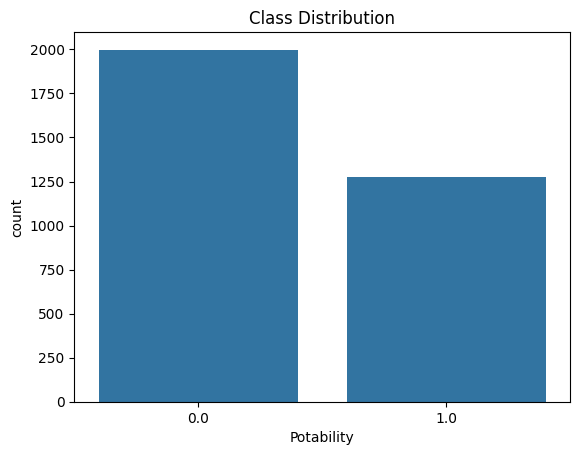

In [12]:
# Class Distribution
sns.countplot(x='Potability', data=df)
plt.title("Class Distribution")
plt.show()

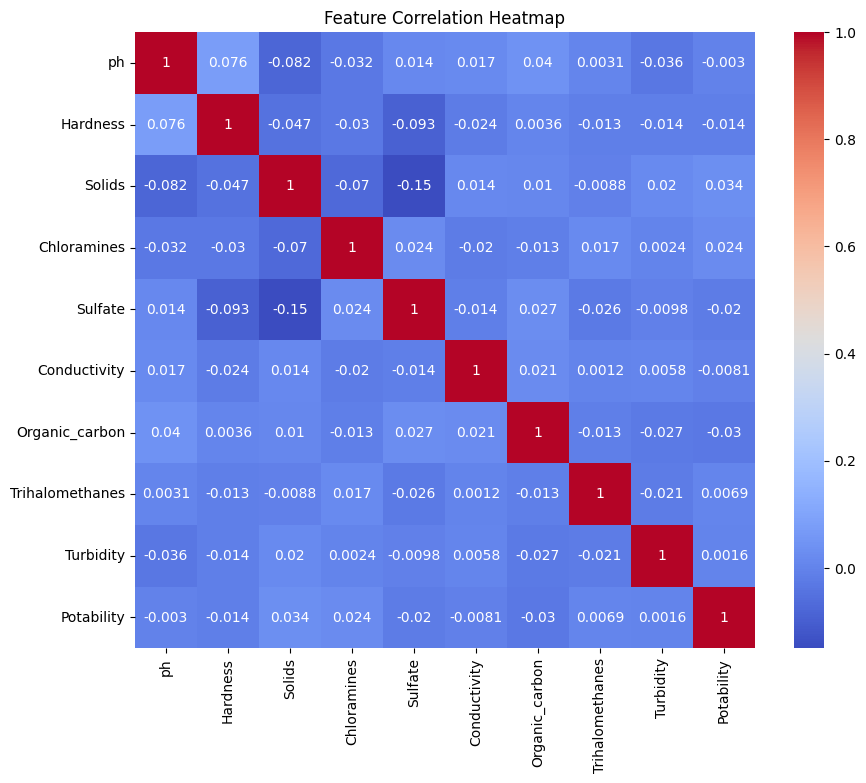

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Feature & Target Split
X = df.drop('Potability', axis=1)
y = df['Potability']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: Potability
0.0    1998
1.0    1278
Name: count, dtype: int64
After SMOTE: Potability
0.0    1998
1.0    1998
Name: count, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [19]:
models = {
    "SVC": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [20]:
# Train & Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)
results_df


,Model,Accuracy,Precision,Recall,F1-score
0,SVC,0.66500,0.668293,0.674877,0.671569
1,Random Forest,0.71625,0.728900,0.701970,0.715182
2,KNN,0.68875,0.675615,0.743842,0.708089
3,Decision Tree,0.62125,0.620609,0.652709,0.636255
4,XGBoost,0.71000,0.711165,0.721675,0.716381


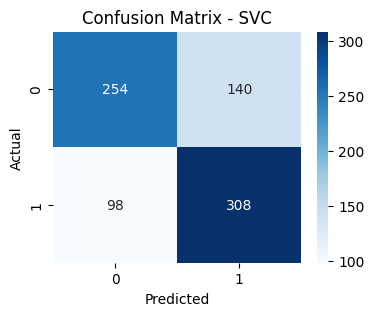

Classification Report - SVC
              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68       394
         1.0       0.69      0.76      0.72       406

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800

------------------------------------------------------------


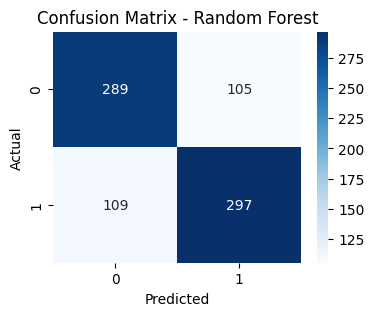

Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       394
         1.0       0.74      0.73      0.74       406

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

------------------------------------------------------------


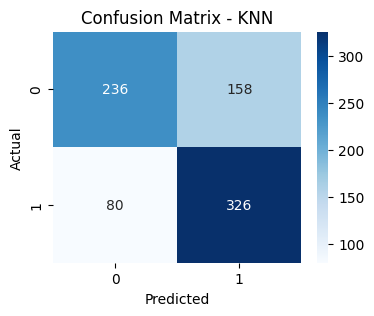

Classification Report - KNN
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.66       394
         1.0       0.67      0.80      0.73       406

    accuracy                           0.70       800
   macro avg       0.71      0.70      0.70       800
weighted avg       0.71      0.70      0.70       800

------------------------------------------------------------


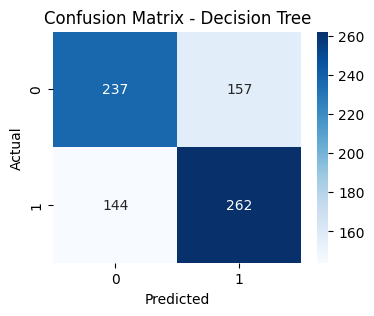

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       394
         1.0       0.63      0.65      0.64       406

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.62       800

------------------------------------------------------------


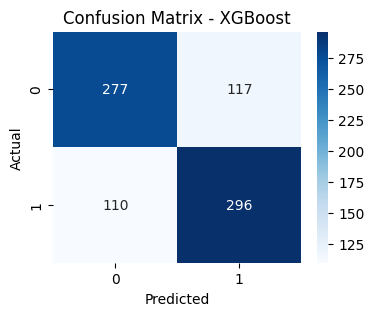

Classification Report - XGBoost
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       394
         1.0       0.72      0.73      0.72       406

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800

------------------------------------------------------------


In [36]:
# Confusion Matrices
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print(f"Classification Report - {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


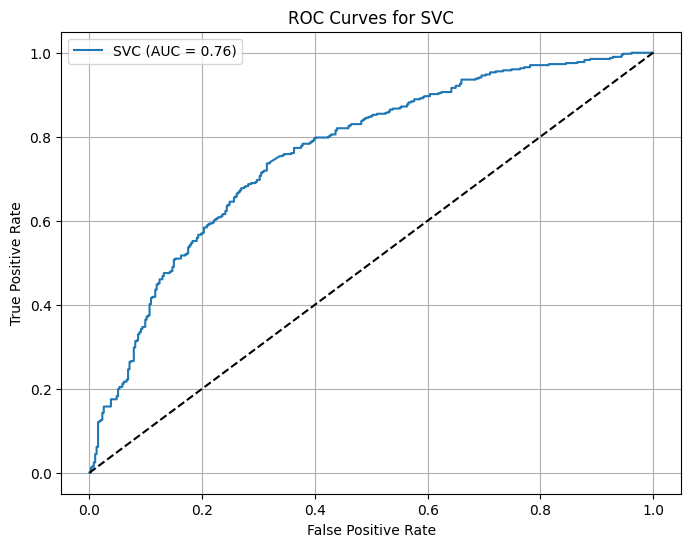

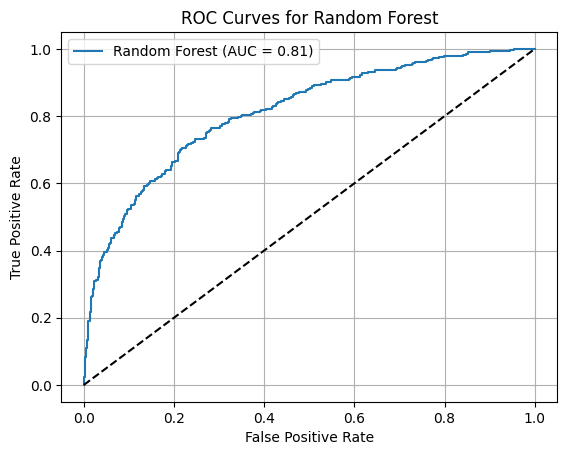

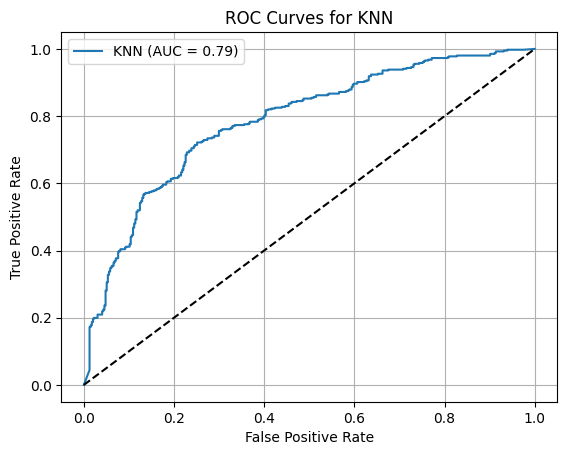

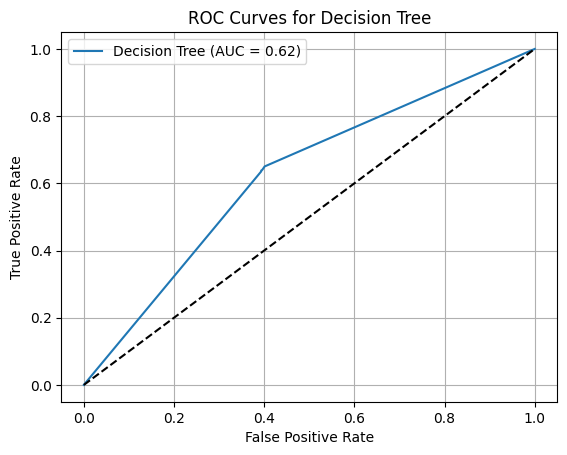

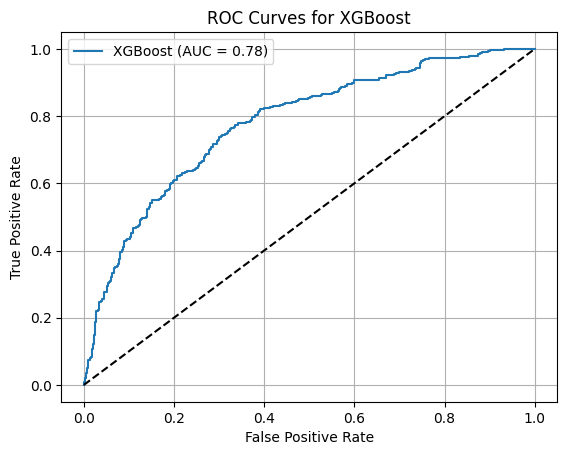

In [41]:
plt.figure(figsize=(8,6))

for name, model in tuned_models.items():
    
    # Some models (like SVC) use predict_proba only if enabled
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Random guess line
    plt.plot([0,1], [0,1], linestyle='--', color='black')

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves for {name}")
    plt.legend()
    plt.grid()
    plt.show()


In [42]:
# Hyperparameter Tuning (SVC)
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(
    SVC(probability=True),
    svc_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_

print("Best SVC Params:", svc_grid.best_params_)


Best SVC Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [43]:
# Hyperparameter Tuning (RF)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("Best Random Forest Params:", rf_grid.best_params_)


Best Random Forest Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
# Hyperparameter Tuning (KNN)
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

print("Best KNN Params:", knn_grid.best_params_)


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [45]:
# Hyperparameter Tuning (Decision Tree)
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

print("Best Decision Tree Params:", dt_grid.best_params_)


Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}


In [46]:
# Hyperparameter Tuning (XGBoost)
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    xgb_params,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
best_xgb = xgb_random.best_estimator_

print("Best XGBoost Params:", xgb_random.best_params_)


Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [47]:
tuned_models = {
    "SVC": best_svc,
    "Random Forest": best_rf,
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "XGBoost": best_xgb
}

tuned_results = []

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    tuned_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

tuned_results_df = pd.DataFrame(
    tuned_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

tuned_results_df.sort_values(by="F1-score", ascending=False)


,Model,Accuracy,Precision,Recall,F1-score
1,Random Forest,0.73250,0.738806,0.731527,0.735149
2,KNN,0.70250,0.673554,0.802956,0.732584
4,XGBoost,0.71625,0.716707,0.729064,0.722833
0,SVC,0.70250,0.687500,0.758621,0.721311
3,Decision Tree,0.62375,0.625298,0.645320,0.635152


In [48]:
best_model_name = tuned_results_df.sort_values(
    by="F1-score", ascending=False
).iloc[0]["Model"]

best_model_name


'Random Forest'

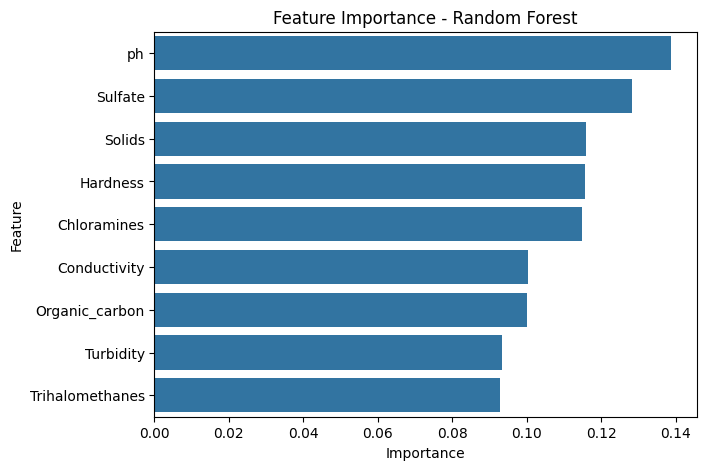

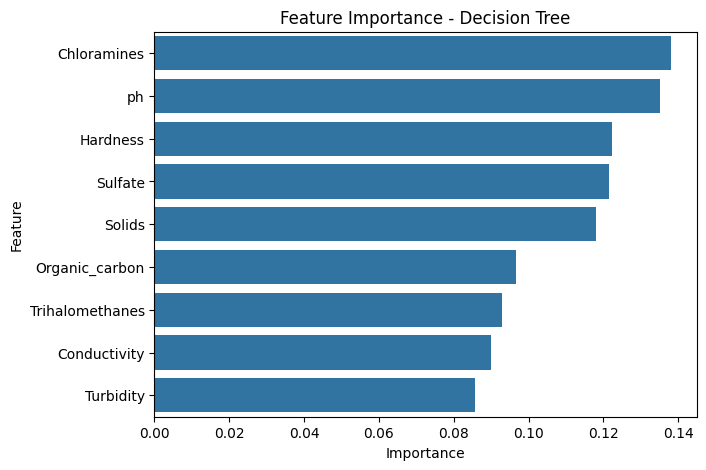

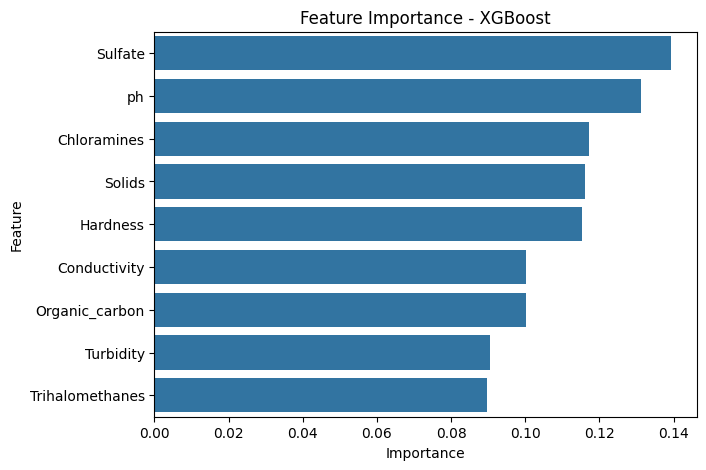

In [51]:
tuned_models = {
    "SVC": best_svc,
    "Random Forest": best_rf,
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "XGBoost": best_xgb
}

feature_names = X.columns

tree_models = {
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "XGBoost": best_xgb
}

for name, model in tree_models.items():
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(7,5))
    sns.barplot(x="Importance", y="Feature", data=importance_df)
    plt.title(f"Feature Importance - {name}")
    plt.show()
